In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
# Read Dataset
dataset = pd.read_csv("IceCreamData.csv")

## Data Understanding

In [3]:
dataset.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [4]:
dataset.columns

Index(['Temperature', 'Revenue'], dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [6]:
dataset.shape

(500, 2)

In [7]:
dataset.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [8]:
dataset.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

In [9]:
# Number of instances in the target class

dataset['Revenue'].value_counts()

621.969209    1
654.197406    1
278.418265    1
401.433018    1
501.732990    1
             ..
827.684831    1
649.561175    1
478.598509    1
308.894518    1
684.803070    1
Name: Revenue, Length: 500, dtype: int64

### To see how Revenue are related with Temperature

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


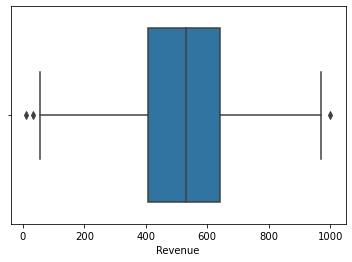

In [10]:
sns.boxplot(dataset['Revenue'])
plt.show()

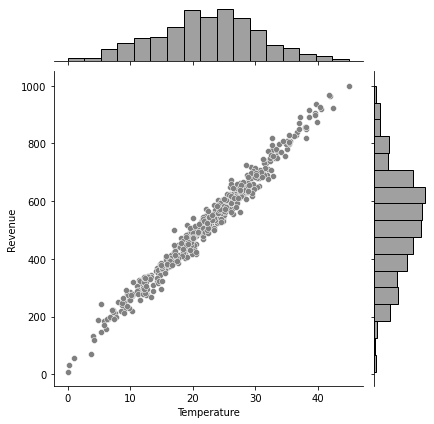

In [11]:
sns.jointplot(x='Temperature',y='Revenue',data=dataset,color='gray')

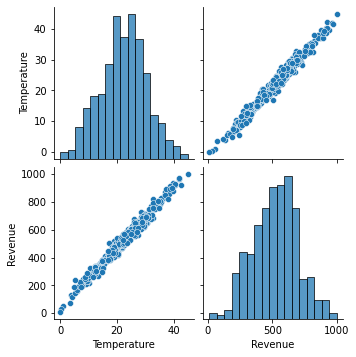

In [12]:
sns.pairplot(dataset)

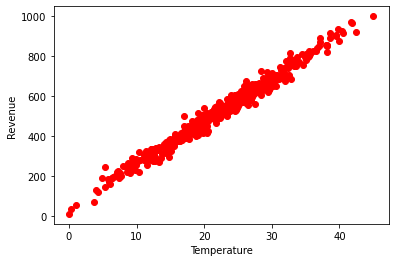

In [13]:
plt.scatter('Temperature','Revenue', data=dataset, color= 'red')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

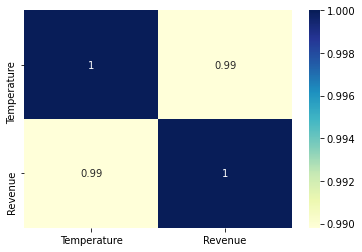

In [14]:
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot = True)
plt.show()

### Data Preparation

We define our target attribute which is y and predictor attribute which is x.
The following means Temperature is represented as 0 and Revenue as 1.


In [15]:
x = dataset.iloc[:,0].values.reshape(-1,1) 
y = dataset.iloc[:,-1].values.reshape(-1,1) 

#### Split the dataset for testing and training

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [17]:
print(f'Total # of sample in whole dataset: {len(x)}')
print("*****"*10)
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Shape of X_train: {x_train.shape}')
print("*****"*10)
print(f'Total # of sample in test dataset: {len(x_test)}')
print(f'Shape of X_test: {x_test.shape}')

Total # of sample in whole dataset: 500
**************************************************
Total # of sample in train dataset: 350
Shape of X_train: (350, 1)
**************************************************
Total # of sample in test dataset: 150
Shape of X_test: (150, 1)


## Building Model - Simple Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
slreg = LinearRegression()
slreg.fit(x_train, y_train)

LinearRegression()

#### Making Prediction

In [20]:
slreg_pred = slreg.predict(x_test)
slreg_pred

array([[697.40760182],
       [652.67518783],
       [664.01048102],
       [451.14537645],
       [664.75022673],
       [442.05219958],
       [583.85242913],
       [623.3625391 ],
       [666.7500596 ],
       [469.23604811],
       [546.84832099],
       [444.08266531],
       [622.49432909],
       [378.73035124],
       [368.21119457],
       [943.18564123],
       [891.63651167],
       [693.5479008 ],
       [546.07634654],
       [421.39940399],
       [392.08451996],
       [596.71982427],
       [284.91295994],
       [654.83874688],
       [382.05091808],
       [413.18421083],
       [372.17594967],
       [510.48997583],
       [480.14543708],
       [457.26943784],
       [639.55061011],
       [283.33932566],
       [315.67211819],
       [470.5172469 ],
       [559.66448707],
       [539.8163622 ],
       [309.24695716],
       [508.91264932],
       [571.29876902],
       [731.11193473],
       [441.12952919],
       [494.7446538 ],
       [567.45606027],
       [444

#### Visualizing the Result

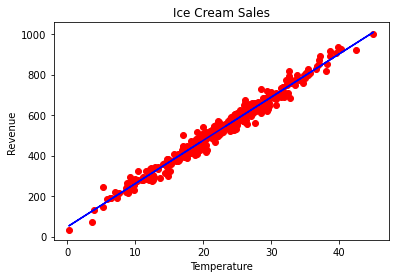

In [30]:
# Visualizing the Result (Training_Set)
plt.scatter(x_train,y_train, color= 'red')
plt.plot(x_train, slreg.predict(x_train), color= 'blue' )
plt.title('Ice Cream Sales')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()


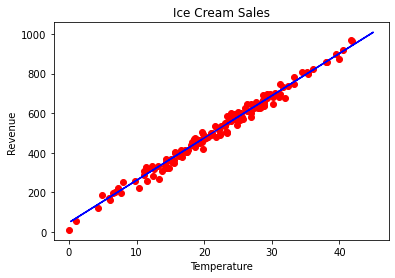

In [32]:
# Visualizing the Result (Test Set)
plt.scatter(x_test,y_test, color='red')
plt.plot(x_train, slreg.predict(x_train), color='blue')
plt.title("Ice Cream Sales")
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()


### Intercept and Slope of the Regression line

In [24]:
#To retrieve the intercept:
print(slreg.intercept_)

#For retrieving the slope:
print(slreg.coef_)

[46.91550105]
[[21.37822239]]


### Evaluation of Model

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, slreg_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, slreg_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, slreg_pred)))

Mean Absolute Error: 17.976807512195343
Mean Squared Error: 503.354709233428
Root Mean Squared Error: 22.435567949874326


In [26]:
print(f'R Square Value of Test Data: {round(r2_score(y_test, slreg.predict(x_test))*100, 2)}%')
print(f'R Square Value of Train Data: {round(r2_score(y_train, slreg.predict(x_train))*100,2)}%')

R Square Value of Test Data: 98.54%
R Square Value of Train Data: 97.68%
